# KNN🔥

In [1]:
%pip install tensorflow

     ---------------------------------------- 0.0/49.8 kB ? eta -:--:--
     ---------------------------------------- 49.8/49.8 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/376.0 MB 3.2 MB/s eta 0:01:58
   ---------------------------------------- 0.1/376.0 MB 1.7 MB/s eta 0:03:36
   ---------------------------------------- 0.2/376.0 MB 1.7 MB/s eta 0:03:43
   ---------------------------------------- 0.3/376.0 MB 1.7 MB/s eta 0:03:36
   ---------------------------------------- 0.4/376.0 MB 2.1 MB/s eta 0:03:02
   ---------------------------------------- 0.4/376.0 MB 1.8 MB/s eta 0:03:25
   ---------------------------------------- 0.5/376.0 MB 1.9 MB/s eta 0:03:23
   ---------------------------------------- 0.6/376.0 MB 1.8 MB/s eta 0:03:24
   ---------------------------------------- 0.7/376.0 MB 1.9 MB/s eta 0:03:23
   ---------------------------------------- 0.8/376.0 MB 1.9 MB/s eta 0:03:

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\dell\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\dell\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\dell\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\dell\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dell\anaconda3\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "c:\Users\dell\anaconda3\Lib\socket.py", line 708, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# Drop the 'Id' column (not useful for prediction)
df = df.drop(columns=['Id'])

In [7]:
# Convert the 'Species' column (labels) into numbers using LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [8]:
# Separate features (X) and target (y)
X = df.drop(columns=['Species'])  # Input features
y = df['Species']                 # Target label

In [9]:
# Split the data into training and testing parts
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Scale the features using StandardScaler (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # Try k=3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Predict the labels for the test set
y_pred = knn.predict(X_test)

In [13]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


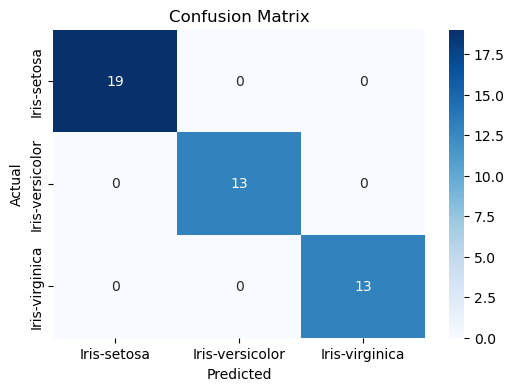

In [14]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()